# recognition of traffic gignal


### Importing the libraries

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [32]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C://Users/Vikash Sonar/Desktop/dataset/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2390 images belonging to 14 classes.


### Preprocessing the Test set

In [34]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C://Users/Vikash Sonar/Desktop/dataset/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 446 images belonging to 14 classes.


In [35]:
training_set.class_indices

{'auto track': 0,
 'bus stop': 1,
 'car parking': 2,
 'cycling one way': 3,
 'go slow': 4,
 'no bike': 5,
 'no left': 6,
 'no parking': 7,
 'no right': 8,
 'speed 80': 9,
 'speed limit': 10,
 'speed70': 11,
 'stop and proceed': 12,
 'zebra crossing': 13}

## Part 2 - Building the CNN

### Initialising the CNN

In [36]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

### Step 2 - Pooling

In [38]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [39]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [40]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [41]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [42]:
cnn.add(tf.keras.layers.Dense(units=14, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [43]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [44]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
75/75 [==============================] - 45s 595ms/step - loss: 1.2594 - accuracy: 0.5715 - val_loss: 0.7573 - val_accuracy: 0.7713
Epoch 2/15
75/75 [==============================] - 42s 566ms/step - loss: 0.5141 - accuracy: 0.8088 - val_loss: 0.2694 - val_accuracy: 0.9238
Epoch 3/15
75/75 [==============================] - 40s 534ms/step - loss: 0.2754 - accuracy: 0.8979 - val_loss: 0.2785 - val_accuracy: 0.9350
Epoch 4/15
75/75 [==============================] - 42s 562ms/step - loss: 0.2234 - accuracy: 0.9276 - val_loss: 0.1939 - val_accuracy: 0.9462
Epoch 5/15
75/75 [==============================] - 42s 566ms/step - loss: 0.1581 - accuracy: 0.9427 - val_loss: 0.1789 - val_accuracy: 0.9439
Epoch 6/15
75/75 [==============================] - 41s 541ms/step - loss: 0.1517 - accuracy: 0.9485 - val_loss: 0.0915 - val_accuracy: 0.9731
Epoch 7/15
75/75 [==============================] - 41s 548ms/step - loss: 0.1046 - accuracy: 0.9686 - val_loss: 0.0718 - val_accuracy: 0.9753

## Part 4 - Making a single prediction

In [45]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C://Users/Vikash Sonar/Desktop/dataset/validation/IMG_20211205_190317_20.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)
training_set.class_indices
           # print(result)
if result[0][0]:
      prediction = 'auto track'
elif result[0][1]:
      prediction = 'bus stop'
elif result[0][2]:
      prediction = 'car parking'
elif result[0][3]:
      prediction = 'cycling one way'
elif result[0][4]:
      prediction = 'go slow'
elif result[0][5]:
      prediction = 'no bike'
elif result[0][6]:
      prediction = 'no left'
elif result[0][7]:
      prediction = 'no parking'
elif result[0][8]:
      prediction =  'no right'
elif result[0][9]:
        prediction = 'speed 80'
elif result[0][10]:
        prediction = 'speed limit'
elif result[0][11]:
        prediction = 'speed70'
elif result[0][12]:
        prediction =  'stop and proceed'
elif result[0][13]:
        prediction = 'zebra crossing'

In [46]:
print(prediction)

cycling one way


In [47]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")




Saved model to disk


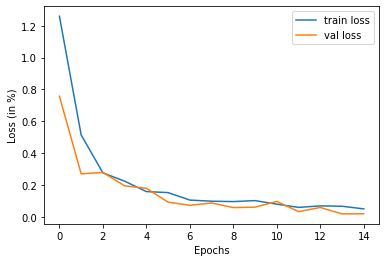

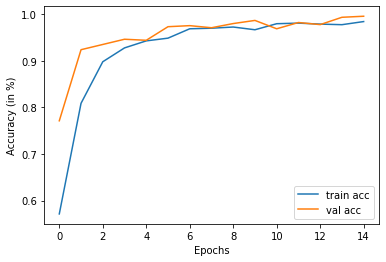

<Figure size 432x288 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (in %)')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in %)')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [49]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [50]:
cnn.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [51]:
from keras.models import load_model

cnn.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del cnn  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [52]:
import sklearn.metrics

y_true = ["positive", "positive", "positive", "negative", "negative", "negative"]
y_pred = ["positive", "positive", "negative", "positive", "negative", "negative"]

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label="positive")
print(recall)

0.6666666666666666
